# Covid-19 Predictions and Time Series Forecasting
## Alexis Casas

## The goal of this project is to make predictions about Covid-19. It is made up of three parts
### I) Investigating the number of hospitalizations
### 2) Predicting who will be hospitalized
### 3) Forecasting when a country will peak

First, importing and reading the data. 

In [159]:
data <- read.csv('diagnosis-of-covid-19-and-its-clinical-spectrum.csv')

In [160]:
head(data)
length(data)

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,⋯,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,44477f75e8169d2,13,negative,f,f,f,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,126e9dd13932f68,17,negative,f,f,f,0.2365154,-0.02234027,-0.517413,0.01067657,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,a46b4402a0e5696,8,negative,f,f,f,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,f7d619a94f97c45,5,negative,f,f,f,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,d9e41465789c2b5,15,negative,f,f,f,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,75f16746216c4d1,9,negative,f,f,f,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 111

Checking for missing values using the 'questionr' library.

In [47]:
#if not already installed please install package
install.packages('questionr')


The downloaded binary packages are in
	/var/folders/hb/6zq315r16hn_lj34r4s5cqhh0000gn/T//RtmpAGtdOM/downloaded_packages


In [161]:
library(questionr)
missingvaluestable <- freq.na(data)
missingvaluestable

,missing,%
mycoplasma_pneumoniae,5644,100
urine_sugar,5644,100
partial_thromboplastin_time_ptt,5644,100
prothrombin_time_pt_activity,5644,100
d_dimer,5644,100
fio2_venous_blood_gas_analysis,5643,100
vitamin_b12,5641,100
lipase_dosage,5636,100
albumin,5631,100
arteiral_fio2,5624,100


About half of the dataset is near 100% missing values. Since I will be examning hospitalizations I will slect the relevant variables that do not have the majority of their values missing. 

In [49]:
install.packages('dplyr')


The downloaded binary packages are in
	/var/folders/hb/6zq315r16hn_lj34r4s5cqhh0000gn/T//RtmpAGtdOM/downloaded_packages


In [50]:
library(dplyr)
data1 <- data[,1:6]
#data1 <- data %>% select(patient_id, patient_age_quantile, sars_cov_2_exam_result,
                #patient_addmited_to_regular_ward_1_yes_0_no, patient_addmited_to_semi_intensive_unit_1_yes_0_no,
                #patient_addmited_to_intensive_care_unit_1_yes_0_no)

Next, I will examine the structure of the variables in our dataframe.

In [51]:
str(data1)

'data.frame':	5644 obs. of  6 variables:
 $ patient_id                                        : Factor w/ 5644 levels "001646dfe0e98df",..: 1589 452 3670 5458 4844 2666 1009 1833 3122 2187 ...
 $ patient_age_quantile                              : int  13 17 8 5 15 9 13 16 1 17 ...
 $ sars_cov_2_exam_result                            : Factor w/ 2 levels "negative","positive": 1 1 1 1 1 1 1 1 1 1 ...
 $ patient_addmited_to_regular_ward_1_yes_0_no       : Factor w/ 2 levels "f","t": 1 1 1 1 1 1 1 1 1 1 ...
 $ patient_addmited_to_semi_intensive_unit_1_yes_0_no: Factor w/ 2 levels "f","t": 1 1 1 1 1 1 1 1 2 1 ...
 $ patient_addmited_to_intensive_care_unit_1_yes_0_no: Factor w/ 2 levels "f","t": 1 1 1 1 1 1 1 1 1 1 ...


Next, I will encode variables as numeric values. This way calculations can be done with the values.
Later on in the project I will be using Random Forest to train and make predictions. It is important to note there is no need for encoding when using Random Forest.

In [52]:
data1$sars_cov_2_exam_result <- as.numeric(data1$sars_cov_2_exam_result)
data1$patient_addmited_to_regular_ward_1_yes_0_no <- as.numeric(data1$patient_addmited_to_regular_ward_1_yes_0_no)
data1$patient_addmited_to_semi_intensive_unit_1_yes_0_no <- as.numeric(data1$patient_addmited_to_semi_intensive_unit_1_yes_0_no)
data1$patient_addmited_to_intensive_care_unit_1_yes_0_no <- as.numeric(data1$patient_addmited_to_intensive_care_unit_1_yes_0_no)

In [53]:
data1 <- data1[-1] #removing PatientID: not helpful when making predictinos
str(data1)

'data.frame':	5644 obs. of  5 variables:
 $ patient_age_quantile                              : int  13 17 8 5 15 9 13 16 1 17 ...
 $ sars_cov_2_exam_result                            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ patient_addmited_to_regular_ward_1_yes_0_no       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ patient_addmited_to_semi_intensive_unit_1_yes_0_no: num  1 1 1 1 1 1 1 1 2 1 ...
 $ patient_addmited_to_intensive_care_unit_1_yes_0_no: num  1 1 1 1 1 1 1 1 1 1 ...


Now that the data is structured properly, the number of hospitalizations can be investigated.

### I) Investigating the number of hospitalizations
First I will attempt to plot the exam results

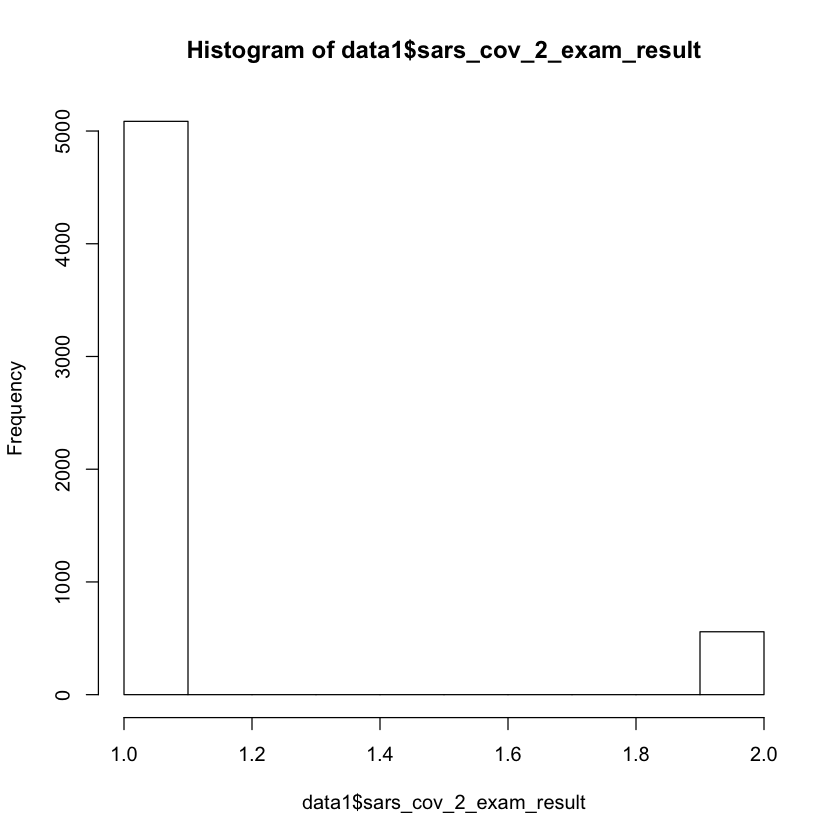

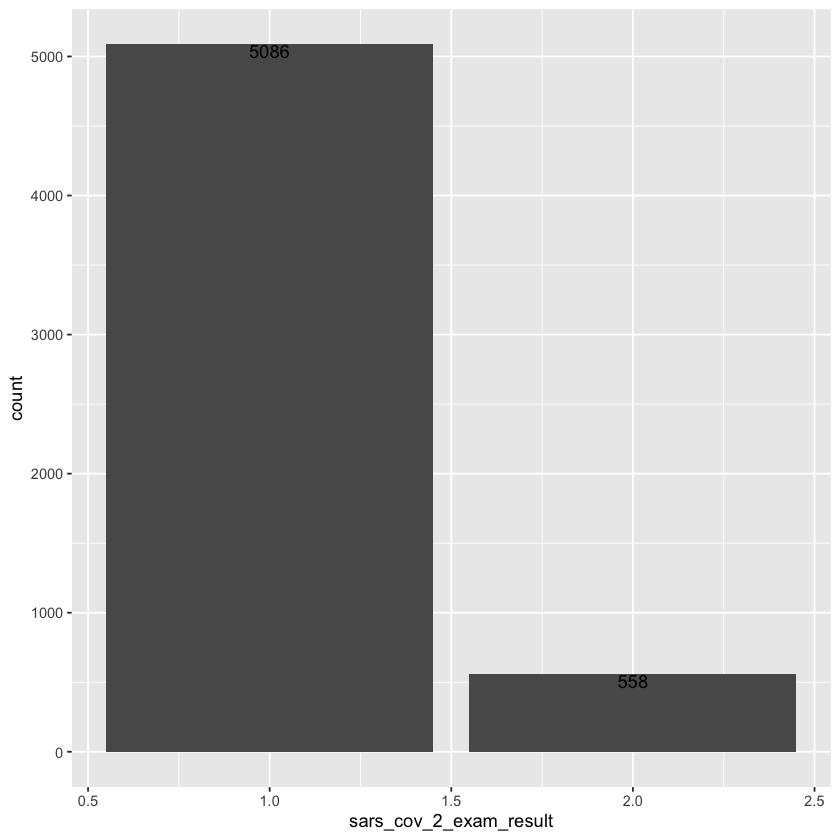

In [54]:
hist(data1$sars_cov_2_exam_result) #the plot is viewing this as numeric
library(ggplot2)
plot1 <- ggplot(data=data1, aes(x=sars_cov_2_exam_result, fill=sars_cov_2_exam_result)) + geom_bar()
plot1 <- plot1 +geom_text(stat = 'count', aes(label = ..count..), vjust=1) #Adding data labels here 
plot1

The plot is currently being viewed as numeric. I would like to know who out of these individuals were admitted for hospitalization. For this reason, I will create a colum describing whether a person has been admitted or not. Then, I will plot the admitted column

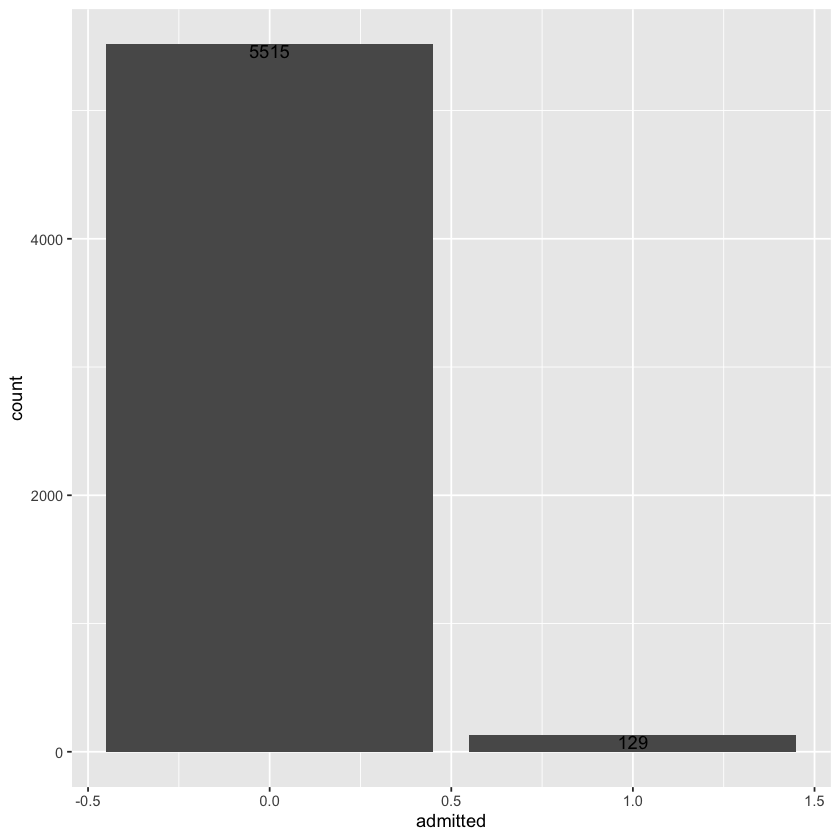

In [55]:
data1$admitted <- ifelse(data1$patient_addmited_to_regular_ward_1_yes_0_no+data1$patient_addmited_to_regular_ward_1_yes_0_no+
                           data1$patient_addmited_to_semi_intensive_unit_1_yes_0_no>3, 1, 0)
plot2 <- ggplot(data=data1, aes(x=admitted, fill=admitted)) + geom_bar()
plot2 <- plot2 +geom_text(stat = 'count', aes(label = ..count..), vjust=1) #Adding data labels here 
plot2

Now, the admitted colum can be segmented by the individuals exam result. This will be done using facet_wrap.  

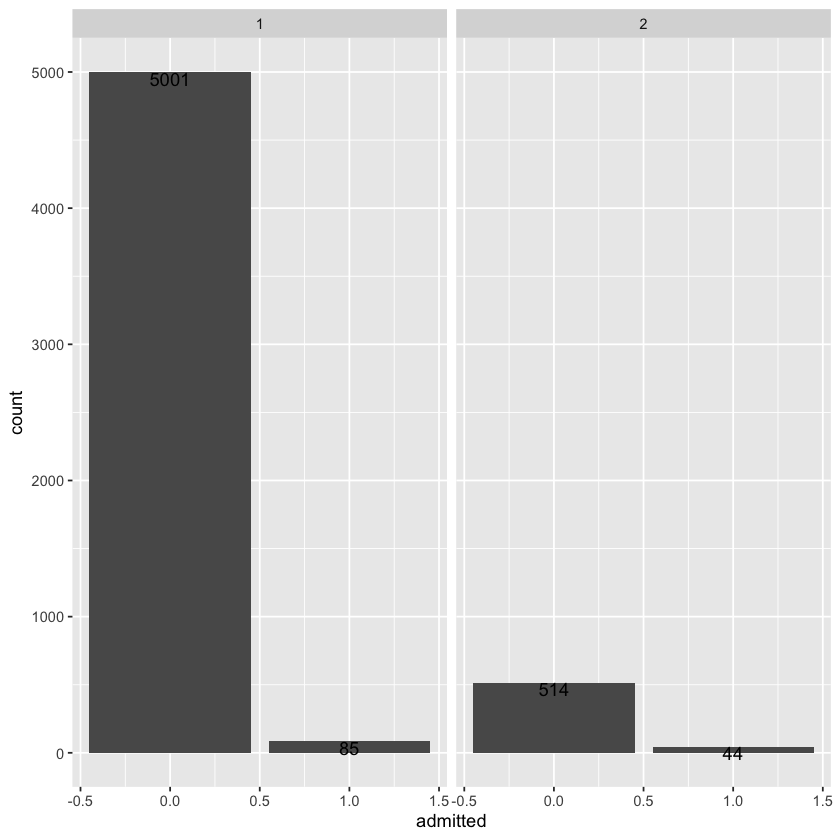

In [56]:
plot3 <- ggplot(data=data1, aes(x=admitted, fill=admitted)) + geom_bar() +facet_wrap(~sars_cov_2_exam_result)
plot3 <- plot3 + geom_text(stat = 'count', aes(label = ..count..), vjust=1) #Adding data labels here 
plot3

I would like to understand the relationship between testing and admittance. For correlation, the variable has to be numeric (it is not compatable with binary or categorical variables). Since testing and admittance are binomial you would need to preform regression and calssification. 

To deal with this, I will change the admitted coloum to categorical. 

In [121]:
data1$admitted <- as.factor(data1$admitted) 

### 2) Predicting who will be hospitalized

To make predictions on who will be admitted, I need to preform classification. Classification is a good fit when the response variable is categorical. 

To fully understand the power and weaknesses of forecasting I will do the following:

1) Use a decision trees classifier

2) Use random forest classifier

3) Examine the ROC curve

4) Fix the unbalanced data set

5) Preform K-fold validation

6) Make predictions!!!

Decision Tree:

In [58]:
require(tree)

In [59]:
tree.admitted <- tree(admitted~ sars_cov_2_exam_result + patient_age_quantile, data=data1)
summary(tree.admitted)


Classification tree:
tree(formula = admitted ~ sars_cov_2_exam_result + patient_age_quantile, 
    data = data1)
Number of terminal nodes:  5 
Residual mean deviance:  0.1898 = 1070 / 5639 
Misclassification error rate: 0.02286 = 129 / 5644 

Interpretation of the mean deviance: 
The mean deviance is a measure of the error in the tree after construction. The residual mean deviance here is about 0.189
Next, I would like to check the accuracy of our prediction. To do this I will subract the misclassification error rate by 1.

In [60]:
acc <- 1-0.022
acc

[1] 0.978

An accuracy around 98% tells me something is wrong within the data itself. One reason for this could be an imbalanced dataset. If 99% of the response variable is 1(admitted) and only 1% is 0(not admitted) then the decision tree may classify everyone as admitted. The tree here does not really learn the pattern. To take care of this issue the data needs to be balanced. 

Lets make predictions just for fun!

In [61]:
y_pred <- predict(tree.admitted, newdata=data1)
y_pred # woops our class(data1$admitted) is numeric. This means the decision tree regressed not classified

,0,1
1,0.9900332,0.009966777
2,0.9900332,0.009966777
3,0.9900332,0.009966777
4,0.9900332,0.009966777
5,0.9900332,0.009966777
6,0.9900332,0.009966777
7,0.9900332,0.009966777
8,0.9900332,0.009966777
9,0.9900332,0.009966777
10,0.9900332,0.009966777


Splitting the data into training and test sets using caTools library

In [65]:
library(caTools)
set.seed(123)
split <- sample.split(data1$admitted, SplitRatio=0.75)
training_set <- subset(data1, split==TRUE)
test_set <- subset(data1, split==FALSE)

Checking that the data was split properly!

In [66]:
nrow(training_set)
nrow(test_set)

[1] 4233

[1] 1411

I could apply decision trees again but I will move onto Random Forest. Random Forest is an ensembling technique that creates multiple decision trees. Random Forest is capable of regression and classification. Random Forest's forecasting ability will be tested later on. 

Random Forest:

In [68]:
library(randomForest)
set.seed(123)
classifier <- randomForest(admitted~ sars_cov_2_exam_result+ patient_age_quantile, data=data1, 
                           ntree=400, importance=TRUE)

Next, I will make predictions on the test results

In [70]:
y_pred <- predict(classifier, newdata=test_set[,-6])

Examining the results using a confusion matrix:

In [71]:
con_matrix <- table(y_pred, test_set[,6])
con_matrix #Making one sided prediction
accuracy <- ((con_matrix[[1,1]]+con_matrix[[2,2]])/sum(con_matrix))
accuracy

      
y_pred    0    1
     0 1379   32
     1    0    0

[1] 0.977321

Again, the accuracy is a bit concerning. I will take a look at the ROC curve.

ROC Analysis:

In [72]:
install.packages('ROSE')


The downloaded binary packages are in
	/var/folders/hb/6zq315r16hn_lj34r4s5cqhh0000gn/T//RtmpAGtdOM/downloaded_packages


Loaded ROSE 0.0-3




Area under the curve (AUC): 0.500

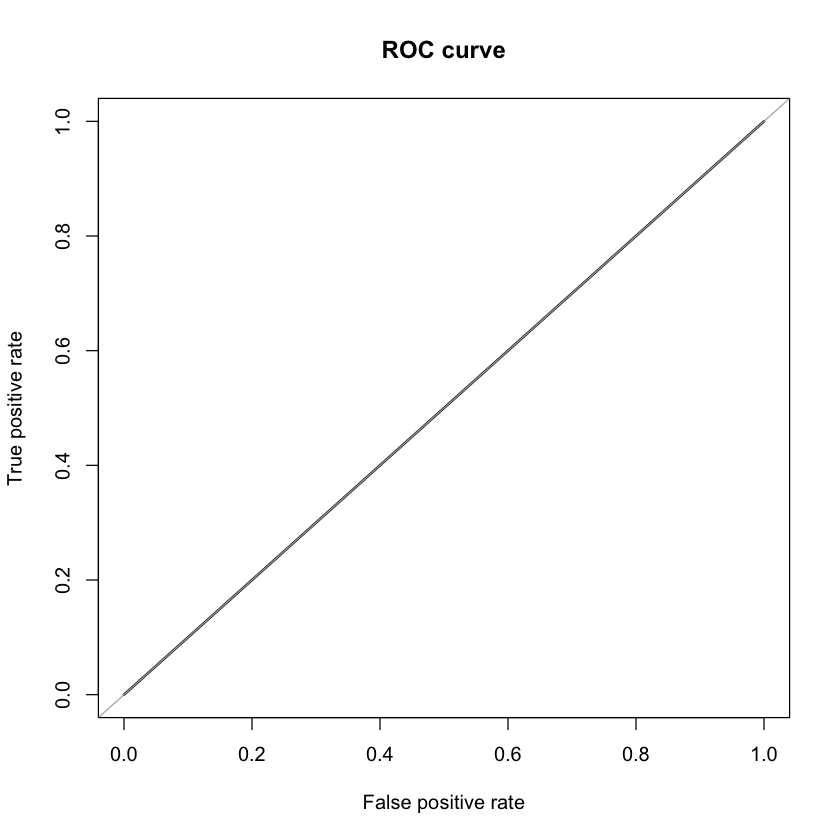

In [73]:
library(ROSE)
roc.curve(test_set[,6], y_pred, plotit = TRUE)

ROC Analysis:
The area under the curve is .5. This is the worst possible situation to be in. It means that the model is unable to distinguish between the positive and negative class.

I will attempt to balance the dataset.

Balancing Data: An over sampling method

In [74]:
library(caret)
library(rpart) 
tab <- table(data1$admitted)
tab #the current imbalanced data

Loading required package: lattice




   0    1 
5515  129 

In [76]:
data2<-data1[,c(1,2,6)]
data2$sars_cov_2_exam_result <- as.factor(data2$sars_cov_2_exam_result)
tab <- table(data2$admitted)
tab


   0    1 
5515  129 

In [77]:
data.over <- ovun.sample(admitted~. , data=data2, method="over", N=11030)$data
tab <- table(data.over$admitted)
tab 


   0    1 
5515 5515 

Now, I can apply Random Forest again and compare the results with the unbalanced classifier.

In [78]:
library(caTools)
split = sample.split(data.over, SplitRatio = 0.75)
training_set = subset(data.over, split==TRUE)
test_set = subset(data.over, split==FALSE)

In [82]:
library(randomForest)
set.seed(123)
classifier = randomForest(admitted~., data= training_set,
                          ntree = 400, imporance=TRUE)

Now, I will preict results

In [84]:
y_pred = predict(classifier, newdata = test_set[,-3]) #3 is where admitted (response) var is

Creating a confusion matric to see predictions

In [85]:
con_matrix <- table(y_pred, test_set[,3])
con_matrix
accuracy <- ((con_matrix[[1,1]]+con_matrix[[2,2]])/sum(con_matrix))
accuracy


      
y_pred    0    1
     0 1535  645
     1  304 1193

[1] 0.7419092

This looks much better. Although the accuracy decreased, the model is actually showing it can distinguish between predicting the outcome. Accuracy is now 74%

Let's investigate the precision and recall 



Call: 
accuracy.meas(response = test_set[, 3], predicted = y_pred)

Examples are labelled as positive when predicted is greater than 0.5 

precision: 0.500
recall: 1.000
F: 0.333

Area under the curve (AUC): 0.742

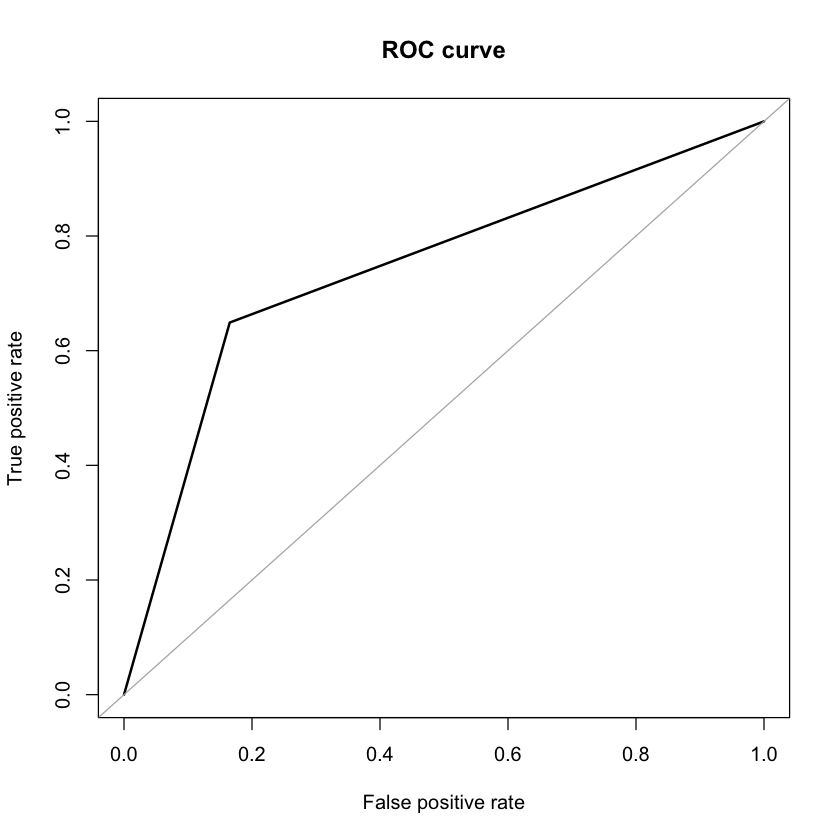

In [86]:
accuracy.meas(test_set[,3], y_pred)
roc.curve(test_set[,3], y_pred, plotit = TRUE)

The ROC curve now shows an AUC of .742. This is an accuracy of about 74% 
As you can see, this is a much better model then before. The model has about a 74% chance of distinguishing between the positive and negative class.

Further Analysis: 

If a patient is in the 17th age quantile and goes in for the test
, will they be admitted?

There are two different ways to approach this question. 
One, I could make my own data row to predict: this is difficult because to compare results you will need to assume a value for admitted. Two, I could filter out the criteria I want from the test set! I will chose to show example two.

Filtering out the criteria from the test set

In [116]:
test3 <-  filter(test_set, patient_age_quantile== 17) 

Next, predict results

In [117]:
y_pred3 = predict(classifier, newdata = test3[,-3])

In [118]:
con_matrix <- table(y_pred3, test3[,3])
con_matrix
accuracy <- ((con_matrix[[1,1]]+con_matrix[[2,2]])/sum(con_matrix))
accuracy

       
y_pred3  0  1
      0 76 44
      1  5 67

[1] 0.7447917

Here the accuracy is about 74.4%. This is a pretty good prediction.

Area under the curve (AUC): 0.771

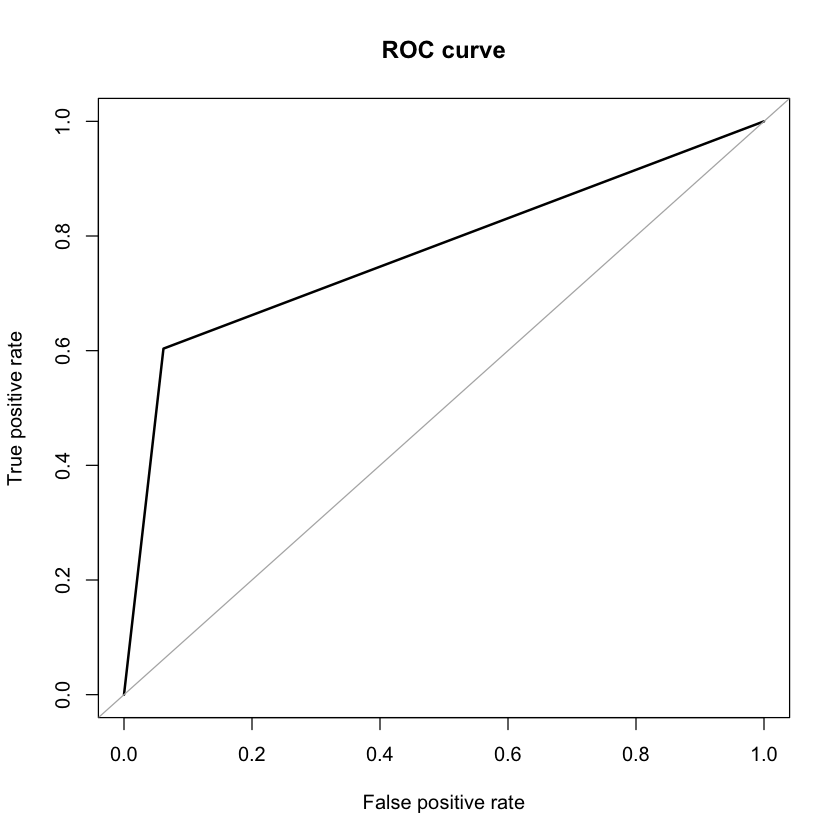

In [119]:
roc.curve(test3[,3], y_pred3, plotit = TRUE)

The ROC curve again, reasures us that the model is making a good prediction.

Finaly, I will preform K-Fold Validation

In [120]:
library(caret)
set.seed(123)
train.control <- trainControl(method = "cv", number = 10) 

#Train the model
model <- train(admitted ~ patient_age_quantile + sars_cov_2_exam_result, data = data2, 
               method = "rf", trControl = train.control) 

#Summarize the results
print(model)

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

Random Forest 

5644 samples
   2 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5079, 5079, 5080, 5080, 5079, 5080, ... 
Resampling results:

  Accuracy   Kappa
  0.9771443  0    

Tuning parameter 'mtry' was held constant at a value of 2


### 3) Forecasting when a country will peak in their number of cases

I will be working with a new dataset that includes Covid-19 information on different countries

In [123]:
spread <- read.csv('geoCovid.csv')

I will split the data into 3 datasets so that forecasting can be done by Country. The dataframes will be made for the US, Spain, and South Korea.

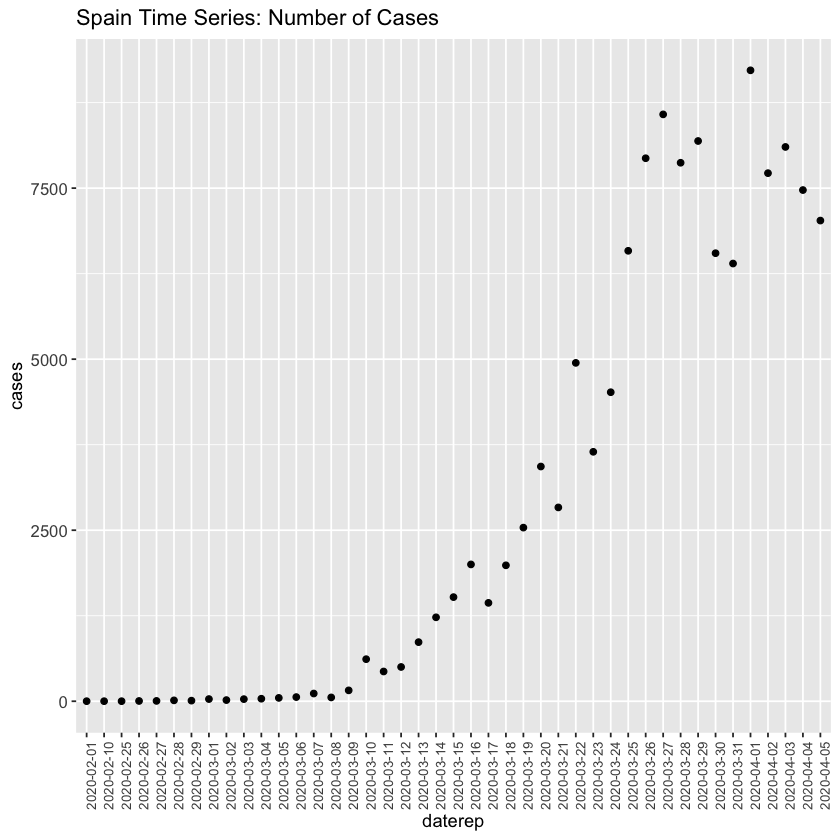

In [124]:
library(dplyr)
spreadinspain <- filter(spread, geoid == "ES") 
spreadinspain2 <- filter(spreadinspain, cases>0) 
#plot using dates and number of cases in spain
library(ggplot2)
sp <- ggplot(data=spreadinspain2, aes(x=daterep, y=cases)) + geom_point()
sp <- sp + labs(title = "Spain Time Series: Number of Cases")
sp <- sp + theme(axis.text.x = element_text(size=8, angle=90))
sp <- sp + theme(axis.text.y = element_text(size=10)) 
sp

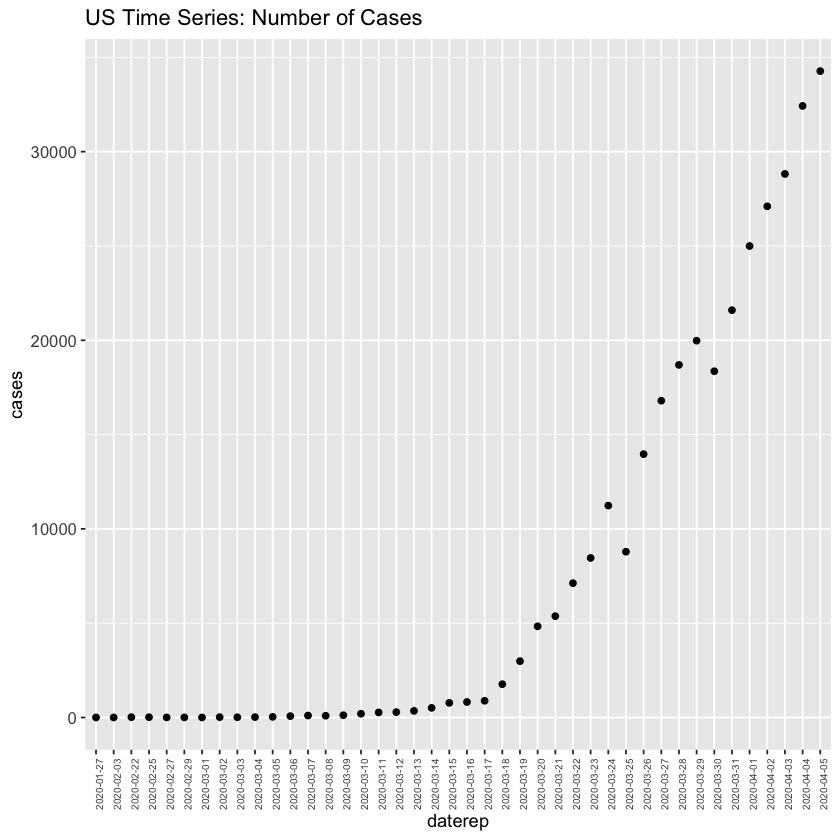

In [125]:
spreadinus <- filter(spread, geoid == "US")
spreadinus2<- filter(spreadinus, cases>2) 
us <- ggplot(data=spreadinus2, aes(x=daterep, y=cases)) + geom_point()
us <- us + labs(title = "US Time Series: Number of Cases")
us <- us + theme(axis.text.x = element_text(size=6, angle=90))
us <- us + theme(axis.text.y = element_text(size=10)) 
us

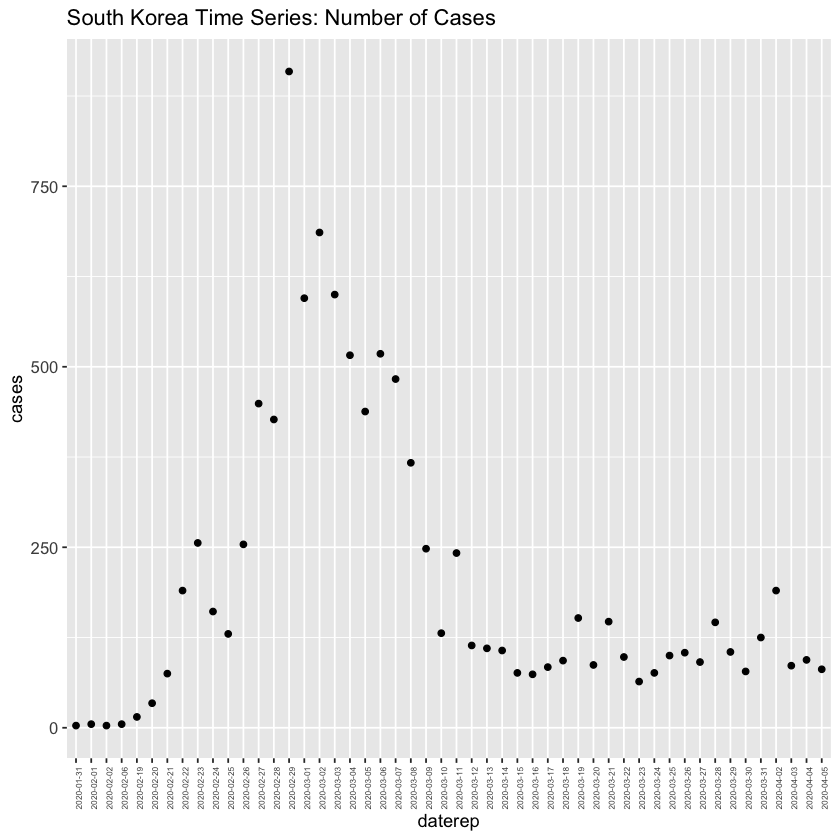

In [126]:
spreadinsouthkorea <- filter(spread, geoid == "KR")
spreadinsouthkorea2<- filter(spreadinsouthkorea, cases>2) 
kr <- ggplot(data=spreadinsouthkorea2, aes(x=daterep, y=cases)) + geom_point()
kr <- kr + labs(title = "South Korea Time Series: Number of Cases")
kr <- kr + theme(axis.text.x = element_text(size=5, angle=90))
kr <- kr + theme(axis.text.y = element_text(size=10)) 
kr

The spreads for each country look pretty different. Since I would like to predict when a country's number of cases will peak, I will focus mainly on the US (South Korea and Spain have already peaked).

How much time was there between the first case and case 34272?

In [127]:
firstcase<- filter(spreadinus, cases>0) 
firstcase<- filter(spreadinus, cases<34272) 
firstcase$daterep <- as.Date(firstcase$daterep)
with(firstcase, difftime(max(daterep), min(daterep)))

Time difference of 95 days

Now, I will investigate the forecasting power of Random Forest.

In [131]:
spreadinus <- spreadinus[,c(1:5, 10)] #Can use select feature in dplyr
spreadinus$day <- as.factor(spreadinus$day)
spreadinus$month <- as.factor(spreadinus$month)
spreadinus$year <- as.factor(spreadinus$year)

Next, I will regress using RF

In [132]:
install.packages('randomForest')


The downloaded binary packages are in
	/var/folders/hb/6zq315r16hn_lj34r4s5cqhh0000gn/T//RtmpAGtdOM/downloaded_packages


In [133]:
library(randomForest)
spreadinus <- spreadinus[order(spreadinus$daterep),] #Ordering data for ascending order

Now, I will make the actual random forest model and preform feature ranking.

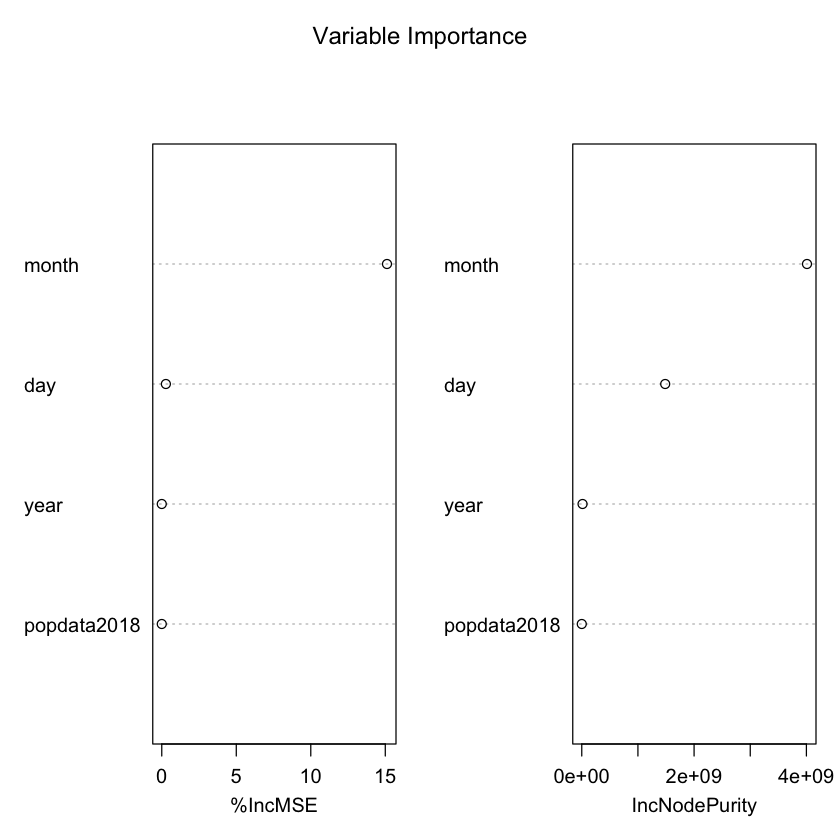

In [135]:
rf_mod <- randomForest(cases~., data=spreadinus[,-1], ntree=100, mtry=3, importance=TRUE)
varImpPlot(rf_mod, main="Variable Importance")
#IncMSE: Mean Square Error: important when youre regressing
#IncNodePurity: important when you're classifying

Let's predict the current data

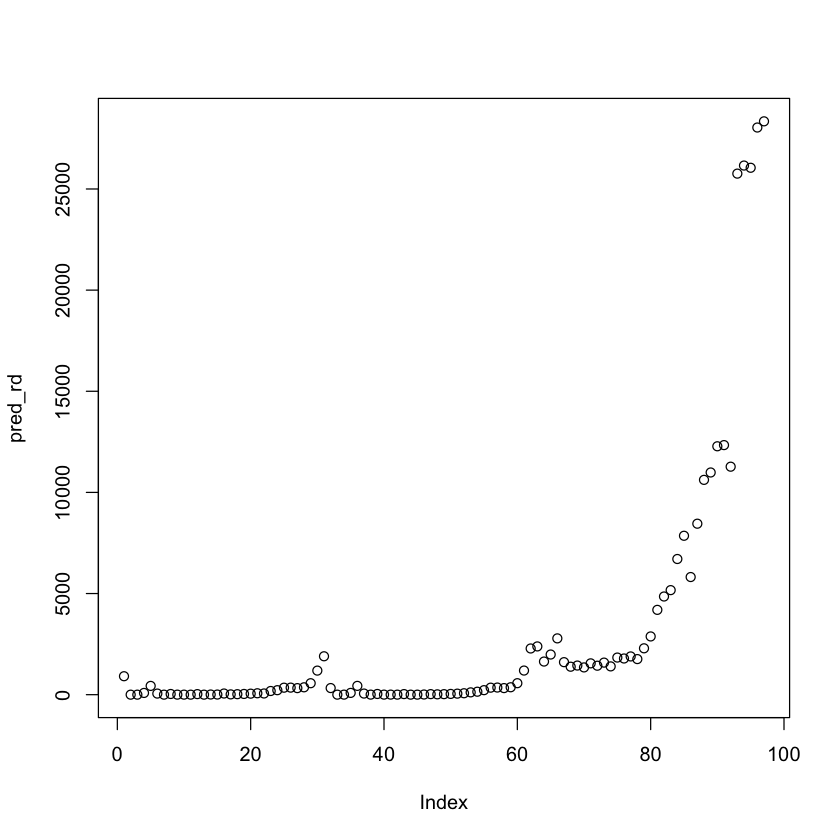

In [136]:
pred_rd <- predict(rf_mod, spreadinus[,-c(1,5)])
plot(pred_rd)

How would the forecasting look for 10 days?
Let's create a list of dates to test.

In [137]:
install.packages('lubridate')


The downloaded binary packages are in
	/var/folders/hb/6zq315r16hn_lj34r4s5cqhh0000gn/T//RtmpAGtdOM/downloaded_packages


In [139]:
library(lubridate)
dates <- data.frame(daterep=seq(as.Date('2020-04-06'), by='days', length=10))
dates$day <- factor(day(dates$daterep))
dates$month <- factor(month(dates$daterep))
dates$year <- factor(year(dates$daterep))
dates$popdata2018 <- rep(327167434, times=10)
dates$popdata2018 <- as.integer(dates$popdata2018)

Merge the data in a new dataframe called combined. Then, have the model predict on the new data.

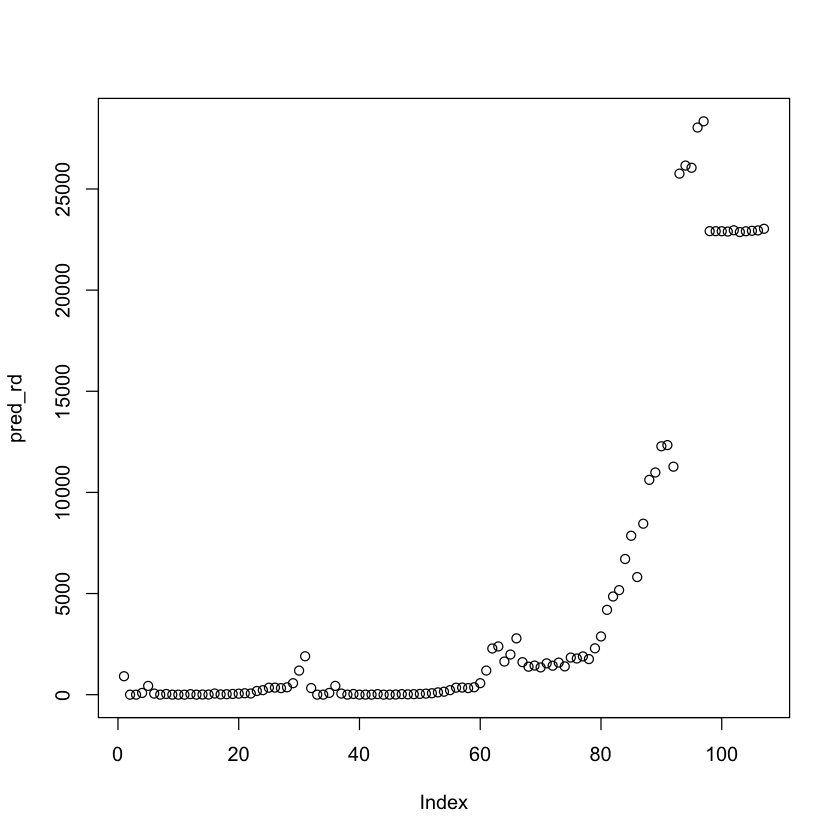

In [140]:
combined <- rbind(spreadinus[,-5], dates)
pred_rd <- predict(rf_mod, combined[,-1])
plot(pred_rd)

The main take away here is that Random Forest does not understand time series trends well. When there is a pattern of seasonality there are methods available to help Random Forest understand the trend. Because there is no real pattern of seasonality in our dataset, lets compare Random Forests forecasting ability to ARIMA and SMA's ability.

First, I would like to show the ARIMA Method:

In [147]:
install.packages('forecast')
install.packages('rpart')


The downloaded binary packages are in
	/var/folders/hb/6zq315r16hn_lj34r4s5cqhh0000gn/T//RtmpAGtdOM/downloaded_packages

The downloaded binary packages are in
	/var/folders/hb/6zq315r16hn_lj34r4s5cqhh0000gn/T//RtmpAGtdOM/downloaded_packages



 ARIMA(0,2,0)                    : 1097.315
 ARIMA(0,2,1)                    : 1099.402
 ARIMA(0,2,2)                    : 1101.536
 ARIMA(0,2,3)                    : Inf
 ARIMA(0,2,4)                    : Inf
 ARIMA(0,2,5)                    : Inf
 ARIMA(1,2,0)                    : 1099.402
 ARIMA(1,2,1)                    : 1101.536
 ARIMA(1,2,2)                    : 1103.716
 ARIMA(1,2,3)                    : Inf
 ARIMA(1,2,4)                    : Inf
 ARIMA(2,2,0)                    : 1101.536
 ARIMA(2,2,1)                    : 1103.716
 ARIMA(2,2,2)                    : 1105.946
 ARIMA(2,2,3)                    : Inf
 ARIMA(3,2,0)                    : 932.9565
 ARIMA(3,2,1)                    : 935.1862
 ARIMA(3,2,2)                    : 937.4666
 ARIMA(4,2,0)                    : 935.1862
 ARIMA(4,2,1)                    : 937.4666
 ARIMA(5,2,0)                    : 937.4666



 Best model: ARIMA(3,2,0)                    

Series: trend_part 
ARIMA(3,2,0) 

Coefficients:
      

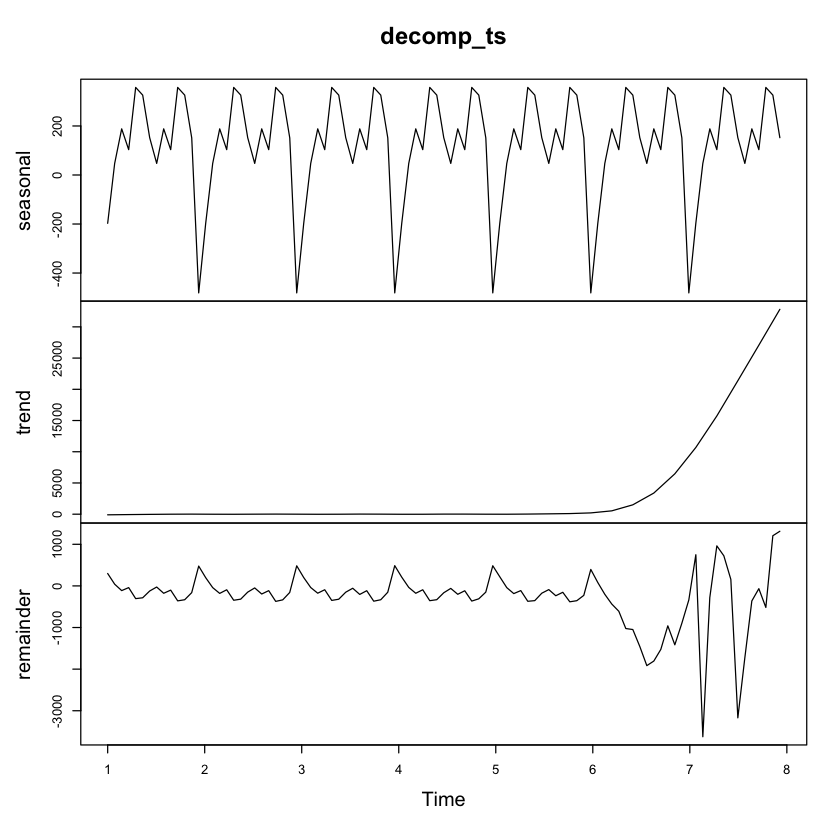


	Ljung-Box test

data:  Residuals from ARIMA(3,2,0)
Q* = 46.842, df = 7, p-value = 5.992e-08

Model df: 3.   Total lags used: 10



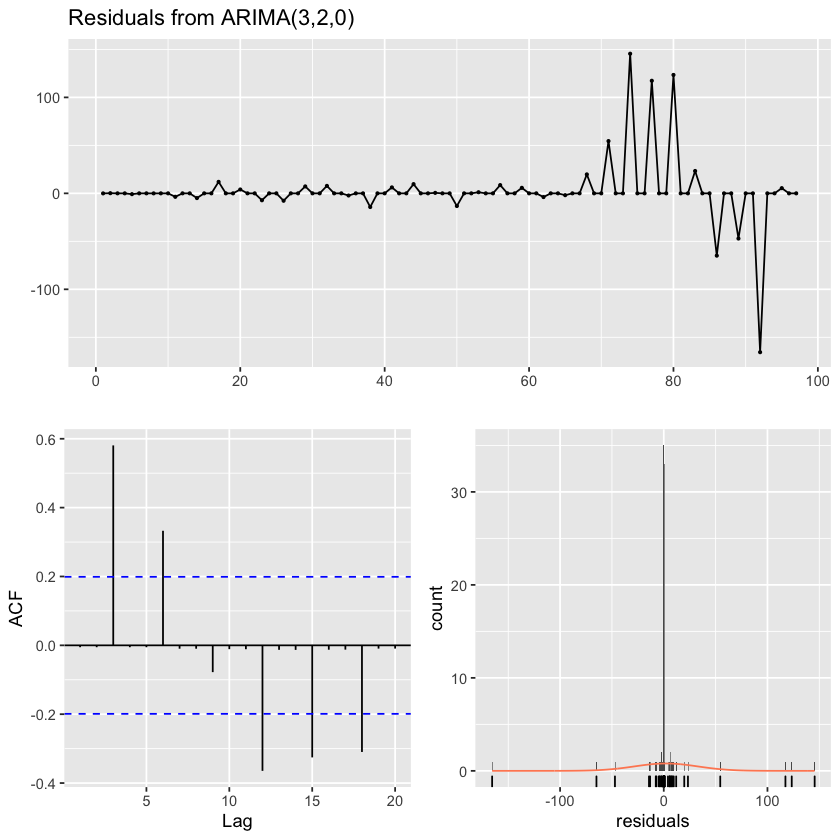

In [151]:
library(forecast)
library(rpart)
period <- 97
data_ts <- ts(spreadinus$cases, freq=period/7)
decomp_ts <- stl(data_ts, s.window = "periodic", robust=FALSE)$time.series
plot(decomp_ts)
trend_part <- ts(decomp_ts[,2])
trend_fit <- auto.arima(trend_part, approximation=FALSE, stepwise=FALSE, trace=2)
print(summary(trend_fit))
checkresiduals(trend_fit)



[1] 131109.9

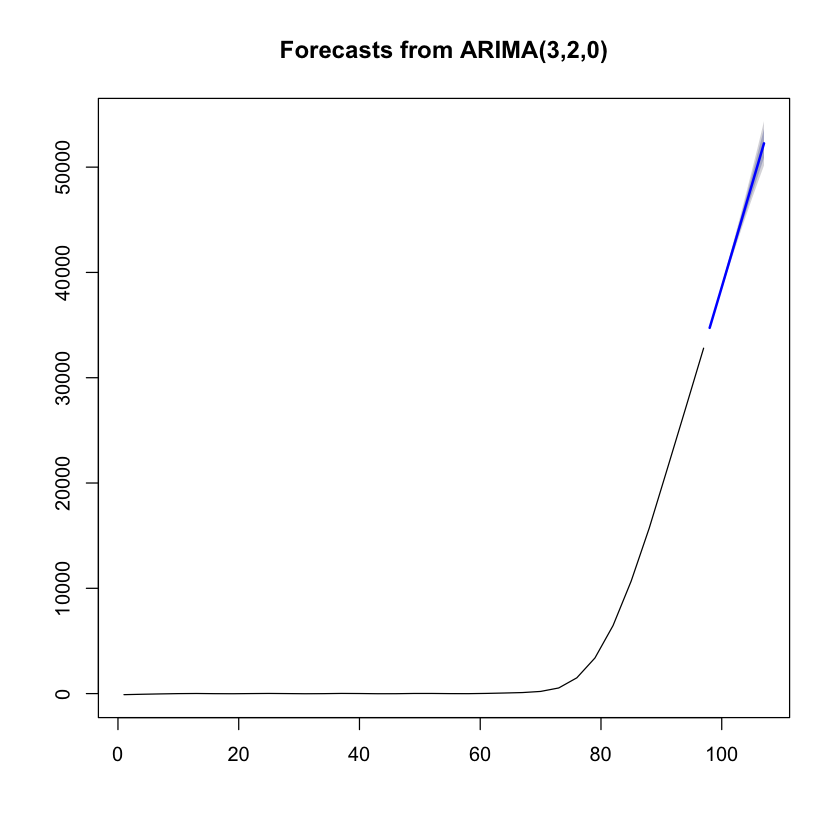

In [152]:
plt_arima <- plot(forecast(trend_fit)) #Arima forcast prediction
trend_for <- as.vector(forecast(trend_fit, period)$mean) #Saving this trend to apply to random forest prediction 
mean(trend_for)

Next, Let's use SMA (Simple Moving Averages)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    0.000     0.286     0.857  2432.851   233.286 26796.000         6 


Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


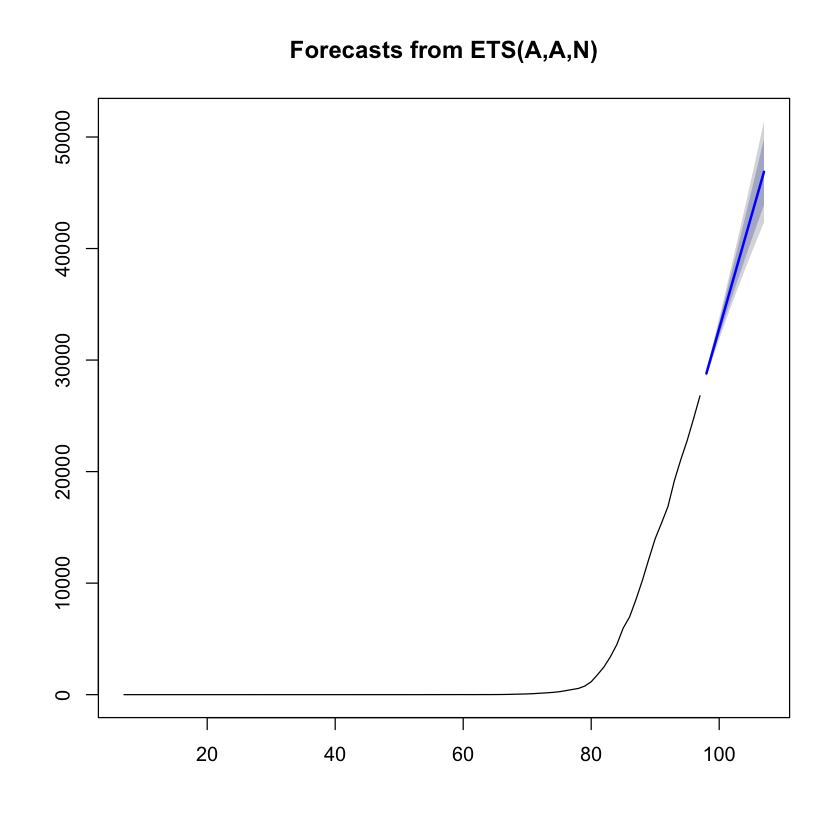

In [155]:
sma <- SMA(spreadinus$cases, n=7, interval=TRUE)
print(summary(sma))
plot(forecast(sma))

Here is a side by side comparison of SMA and ARIMA Forcasts compared to Random Forest

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


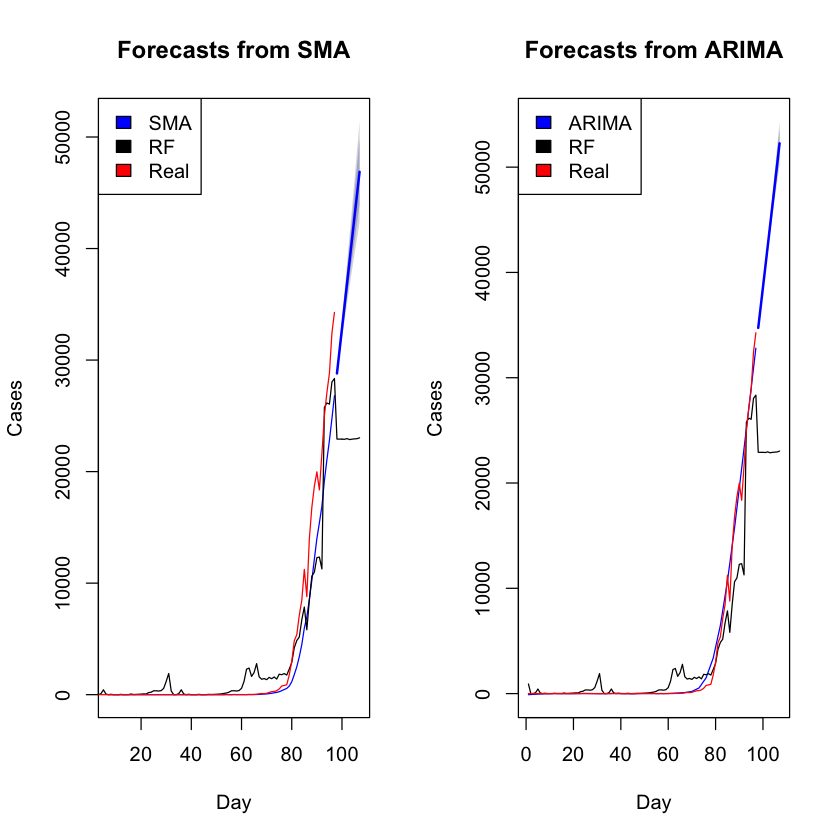

In [156]:
par(mfrow=c(1,2))
plot(forecast(sma), main="Forecasts from SMA", xlab="Day",
     ylab="Cases", col="Blue") 
lines(pred_rd, col="Black")
lines(spreadinus$cases, col="Red")
legend("topleft", c("SMA", "RF", "Real"), fill=c("Blue", "Black", "Red"))
plot(forecast(trend_fit), main="Forecasts from ARIMA", xlab="Day",
     ylab="Cases", col="Blue")  #arima 
lines(pred_rd, col="Black") #random forest
lines(spreadinus$cases, col="Red")
legend("topleft", c("ARIMA", "RF", "Real"), fill=c("Blue", "Black", "Red"))


Conclusion: As you can see, Random Forest was the weakest in making predictions. This has to do with it's innability to recognize the pattern. Altogether, It looks like the ARIMA method was able to get closest to the real data from the original csv file. 